# <center> Classification Bacterial Mycetoma  </center>
<center> <FONT size="5pt"> supervised method </FONT> </center>

<i> <b> Informations about this file :</b> </i> <br>


In this notebook, we can see the classification of the different form of bacterian mycetoma with supervised method:<br>  Linear Model, Bayesian classifier and RandomForest

<i> <b> Importations necessary:</b> </i> <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, metrics, svm

from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from scikitplot.metrics import plot_confusion_matrix

# <font size="5pt" color ="FireBrick" > <center> Part of data management </center> </font>

In [2]:
%run dataManagementPart2.ipynb


In [3]:
file1 = 'radiomics_features_set1.csv'
file2 = 'radiomics_features_set2.csv'

data = readCSV(file1,file2)

In [4]:
y_B, y_F = getLabels(data)
X_B,X_F = getData(data)


scaler = MinMaxScaler()
X_B = scaler.fit_transform(X_B)

X_Bs, y_Bs = resample(X_B, y_B, n_samples=X_B.shape[0], random_state=0,replace=False)


X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_Bs,y_Bs)



(206, 102) (37, 102) (16, 102)


# <font size="5pt" color ="FireBrick" > <center> Part classification by linear model </center> </font>

<b> Linear Model </b> 

- Logistic Regression 

In [5]:
LR = LogisticRegression().fit(X_train_B,y_train_B)

y_LR = LR.predict(X_test_B)

print("score of Logistic Regression :", metrics.accuracy_score(y_test_B,y_LR))


score of Logistic Regression : 0.8


/home/lucie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Linear Discriminant Analysis

In [6]:
LDA= LinearDiscriminantAnalysis().fit(X_train_B,y_train_B)
y_LDA= LDA.predict(X_test_B)


print("score of Linear Discriminant Analysis:",  metrics.accuracy_score(y_test_B,y_LDA))

score of Linear Discriminant Analysis: 0.4307692307692308


- KNeighbors Classifier

In [7]:
KNN = KNeighborsClassifier(n_neighbors=2).fit(X_train_B,y_train_B)
y_KNN = KNN.predict(X_test_B)

print("score of KNeighbors Classifier :", metrics.accuracy_score(y_test_B,y_KNN))


score of KNeighbors Classifier : 0.7692307692307693


# <font size="5pt" color ="FireBrick" > <center> Part evaluation of linear model </center> </font>


# <font size="5pt"> <center> cross validation </center> </font>

In [8]:
cross_validation_LR = cross_val_score(LR, X_B, y_B)
print("Evaluation for Logistic regression :",cross_validation_LR)

Evaluation for Logistic regression : [0.80769231 0.78846154 0.78846154 0.78846154 0.80392157]


/home/lucie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [9]:
cross_validation_LDA = cross_val_score(LDA, X_B, y_B)
print("Evaluation for Linear Discriminant Analysis :",cross_validation_LDA)

Evaluation for Linear Discriminant Analysis : [0.69230769 0.67307692 0.55769231 0.69230769 0.29411765]


In [10]:
cross_validation_KNN= cross_val_score(KNN, X_B, y_B)
print("Evaluation for KNeighbors Classifier :",cross_validation_KNN)

Evaluation for KNeighbors Classifier : [0.80769231 0.78846154 0.75       0.76923077 0.76470588]



# <font size="5pt"> <center> Confusion matrix </center> </font>

<AxesSubplot:title={'center':'Confusion Matric of Logistic regression '}, xlabel='Predicted label', ylabel='True label'>

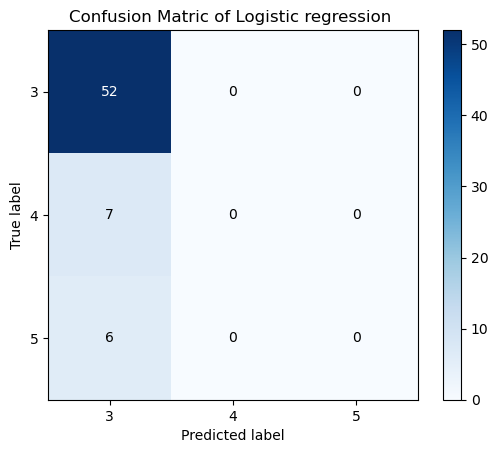

In [11]:
plot_confusion_matrix(y_test_B, y_LR, title="Confusion Matric of Logistic regression ") 

<AxesSubplot:title={'center':'Confusion Matric of Linear Discriminant Analysis'}, xlabel='Predicted label', ylabel='True label'>

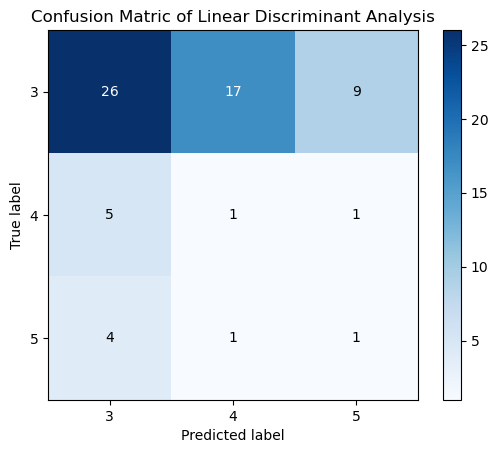

In [12]:
plot_confusion_matrix(y_test_B, y_LDA, title="Confusion Matric of Linear Discriminant Analysis") 


<AxesSubplot:title={'center':'Confusion Matric of KNeighbors Classifier'}, xlabel='Predicted label', ylabel='True label'>

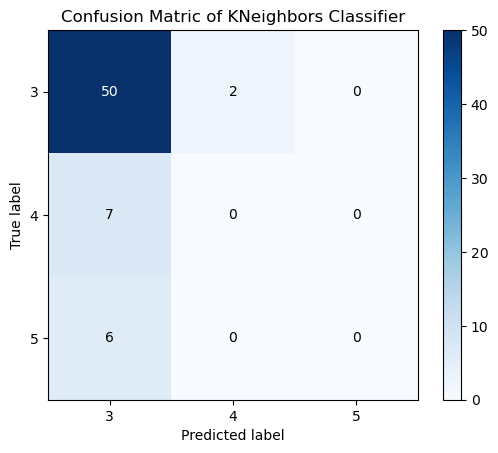

In [13]:
plot_confusion_matrix(y_test_B, y_KNN, title="Confusion Matric of KNeighbors Classifier") 



# <font size="5pt"> <center> Précision, Rappel, F-mesure </center> </font>

In [14]:
f1_LR = f1_score(y_test_B,y_LR,average='micro')
print("Result for Logistic regression : ",f1_LR)

Result for Logistic regression :  0.8000000000000002


In [15]:
f1_LDA = f1_score(y_test_B,y_LDA,average='micro')
print("Result for Logic Discriminant Analysis : ",f1_LDA)

Result for Logic Discriminant Analysis :  0.43076923076923074


In [16]:
f1_KNN = f1_score(y_test_B,y_KNN,average='micro')
print("Result for Logic Discriminant Analysis : ",f1_LDA)

Result for Logic Discriminant Analysis :  0.43076923076923074


<b> Decision Tree </b> 

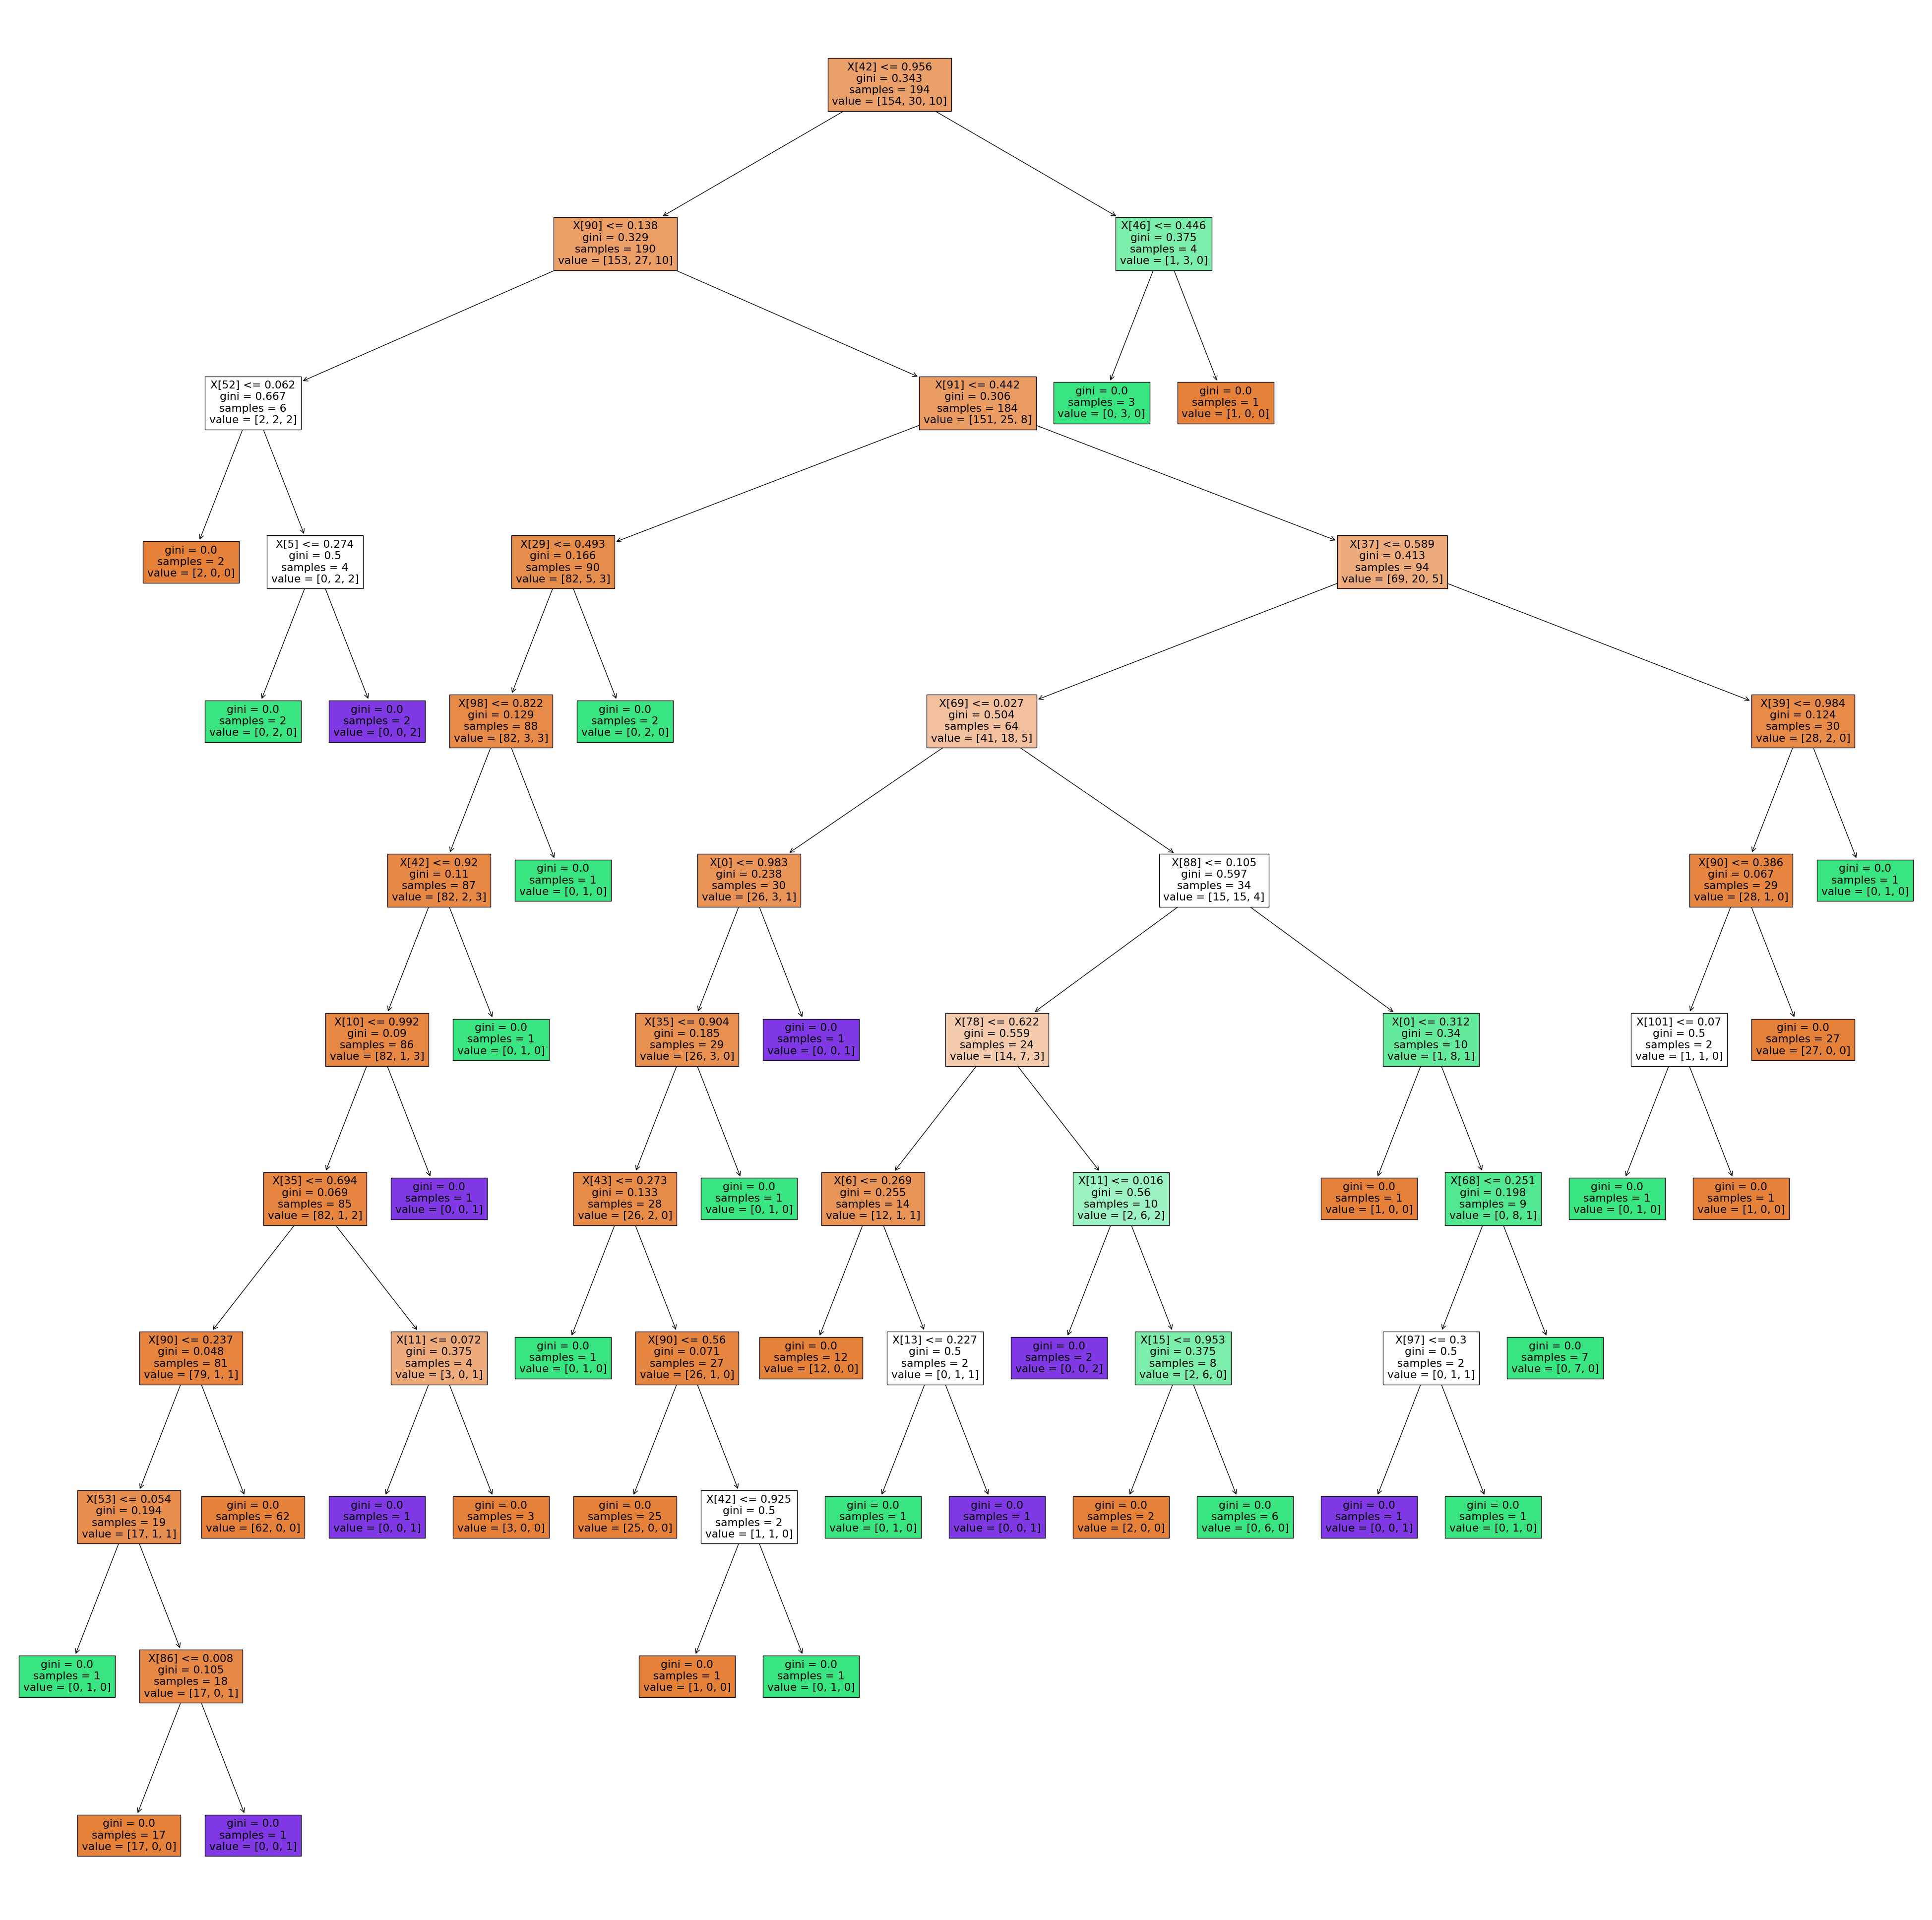

In [17]:
TREE = tree.DecisionTreeClassifier()
#clf = tree.DecisionTreeRegressor()
clf = TREE.fit(X_train_B, y_train_B)


#tree.plot_tree(clf)
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(TREE, filled=True)

<b> Bayesian classifier </b>

- Multinomial Naive Bayes algorithm

In [18]:
multinomial = MultinomialNB()
y_multi = multinomial.fit(X_train_B,y_train_B).predict(X_test_B)

print("score of Multinomial Naive Bayes algorithm:",  metrics.accuracy_score(y_test_B,y_multi))

score of Multinomial Naive Bayes algorithm: 0.7692307692307693


- Bernoulli algorithm

In [19]:
bernoulli = BernoulliNB()
y_bern = bernoulli.fit(X_train_B,y_train_B).predict(X_test_B)

print("score of Bernoulli algorithm:",  metrics.accuracy_score(y_test_B,y_bern))

score of Bernoulli algorithm: 0.8


- Categorical

In [20]:
categorical = CategoricalNB(min_categories=102)
y_cat = categorical.fit(X_train_B,y_train_B).predict(X_test_B)


print("score of Categorical:",  metrics.accuracy_score(y_test_B,y_cat))

score of Categorical: 0.8


# <font size="5pt" color ="FireBrick" > <center> Part evaluation of Bayesian classifier </center> </font>


# <font size="5pt"> <center> cross validation </center> </font>

In [21]:
cv_multi = cross_val_score(multinomial, X_B, y_B)
print("Evaluation for Multinomial Naive Bayes algorithm:",cv_multi)

Evaluation for Multinomial Naive Bayes algorithm: [0.80769231 0.75       0.78846154 0.78846154 0.56862745]


In [22]:
cv_bern = cross_val_score(bernoulli, X_B, y_B)
print("Evaluation for Bernoulli algorithm:",cv_bern)

Evaluation for Bernoulli algorithm: [0.76923077 0.82692308 0.75       0.78846154 0.7254902 ]


In [23]:
cv_cat = cross_val_score(categorical, X_B, y_B)
print("Evaluation for categorical:",cv_cat)

Evaluation for categorical: [0.80769231 0.78846154 0.78846154 0.78846154 0.80392157]



# <font size="5pt"> <center> Confusion matrix </center> </font>

<AxesSubplot:title={'center':'Confusion Multinomial Naive Bayes algorithm'}, xlabel='Predicted label', ylabel='True label'>

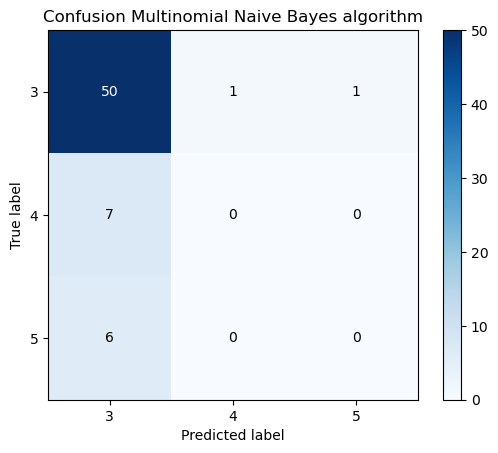

In [24]:
plot_confusion_matrix(y_test_B, y_multi, title="Confusion Multinomial Naive Bayes algorithm") 

<AxesSubplot:title={'center':'Confusion Bernoulli algorithm'}, xlabel='Predicted label', ylabel='True label'>

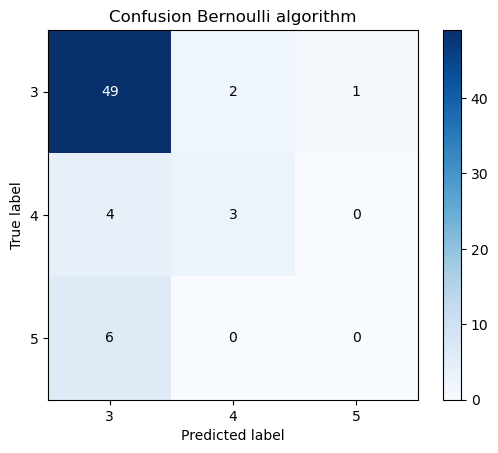

In [25]:
plot_confusion_matrix(y_test_B, y_bern, title="Confusion Bernoulli algorithm") 

<AxesSubplot:title={'center':'Confusion for categorical'}, xlabel='Predicted label', ylabel='True label'>

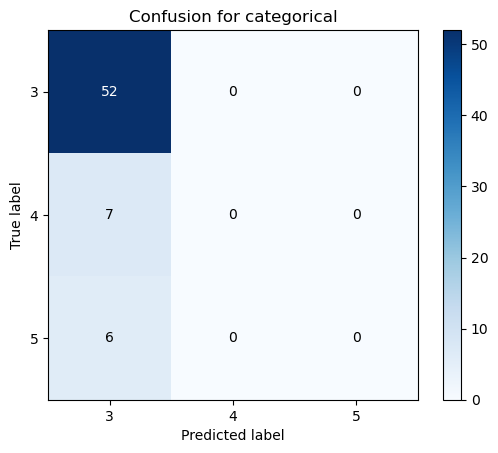

In [26]:
plot_confusion_matrix(y_test_B, y_cat, title="Confusion for categorical") 


# <font size="5pt"> <center> Précision, Rappel, F-mesure </center> </font>

In [27]:
f1_multi= f1_score(y_test_B,y_multi,average='micro')
print("Result for Logistic regression : ",f1_multi)

Result for Logistic regression :  0.7692307692307693


In [28]:
f1_bern= f1_score(y_test_B,y_bern,average='micro')
print("Result for Logistic regression : ",f1_bern)

Result for Logistic regression :  0.8000000000000002


In [29]:
f1_cat= f1_score(y_test_B,y_cat,average='micro')
print("Result for Logistic regression : ",f1_cat)

Result for Logistic regression :  0.8000000000000002
